# Decision Trees and Random Forests in Python


**Learning Objectives**


1. Explore and analyze data using a Pairplot
2. Train a single Decision Tree
3. Predict and evaluate the Decision Tree
4. Compare the Decision Tree model to a Random Forest


## Introduction 

In this lab, you explore and analyze data using a Pairplot, train a single Decision Tree, predict and evaluate the Decision Tree, and compare the Decision Tree model to a Random Forest.  Recall that the [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving both regression and classification problems too.  Simply, the goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

 Each learning objective will correspond to a _#TODO_ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/solutions/decision_trees_and_random_Forests_in_Python.ipynb)

In [1]:
# Ensure the right version of Tensorflow is installed.
!pip freeze | grep tensorflow==2.1 || pip install tensorflow==2.1

     |████████████████████████████████| 421.8 MB 15 kB/s s eta 0:00:01|████▍                           | 57.1 MB 70.6 MB/s eta 0:00:06
     |████████████████████████████████| 50 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 72.1 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 48.7 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=1b08a06327f03701d3641311de86b9596b817d4c2cbd841ba5c24d216cea773e
  Stored in directory: /home/jupyter/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninst

Please ignore any incompatibility warnings and errors and re-run the cell to view the installed tensorflow version.


In [2]:
!pip install scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 7.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


**Restart** the kernel before proceeding further (On the Notebook menu, select Kernel > Restart Kernel > Restart).


## Load necessary libraries 
We will start by importing the necessary libraries for this lab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('../kyphosis.csv')

In [3]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Kyphosis    81 non-null     object
 2   Age         81 non-null     int64 
 3   Number      81 non-null     int64 
 4   Start       81 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


In [14]:
df = df.drop('Unnamed: 0',axis=1)

In [15]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis

**Lab Task #1:** Check a pairplot for this small dataset.

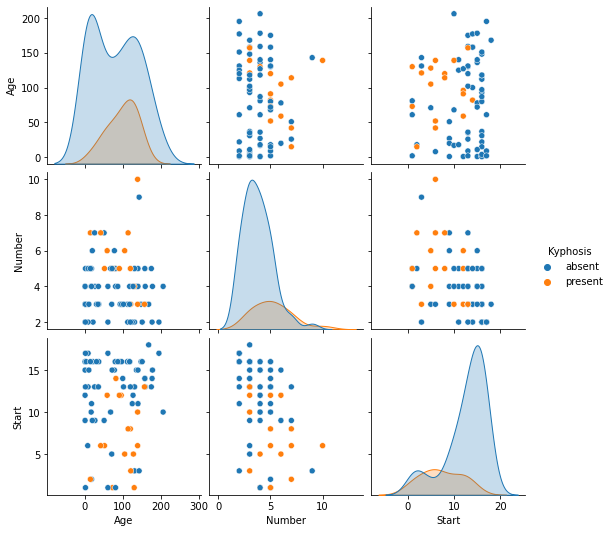

In [16]:
#1
sns.pairplot(df, hue= 'Kyphosis')

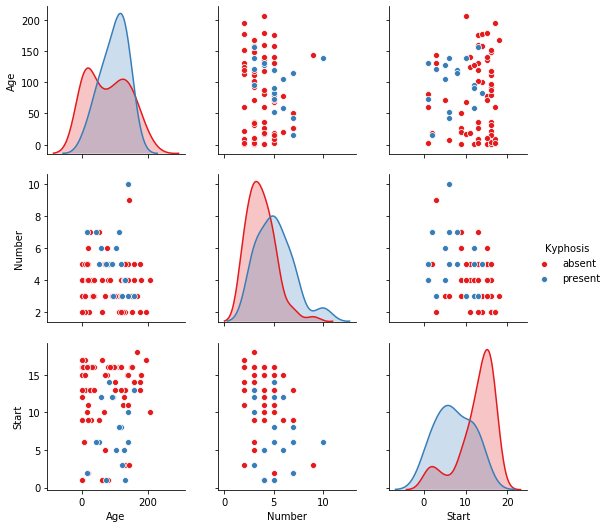

In [ ]:
# TODO 1
# TODO -- Your code here.

## Train Test Split

Let's split up the data into a training set and a test set!

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

**Lab Task #2:** Train a single decision tree.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [27]:
#2
dtree = dtree.fit(X_train, y_train)

In [ ]:
# TODO 2
# TODO -- Your code here.


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation

**Lab Task #3:** Evaluate our decision tree.

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
#3a
# Here we will build a text report showing the main classification metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [ ]:
# TODO 3a
# TODO -- Your code here.


              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [31]:
# Now we can compute confusion matrix to evaluate the accuracy of a classification
# 3b
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 3  2]]


In [ ]:
# TODO 3b
# TODO -- Your code here.


[[17  2]
 [ 4  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [32]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

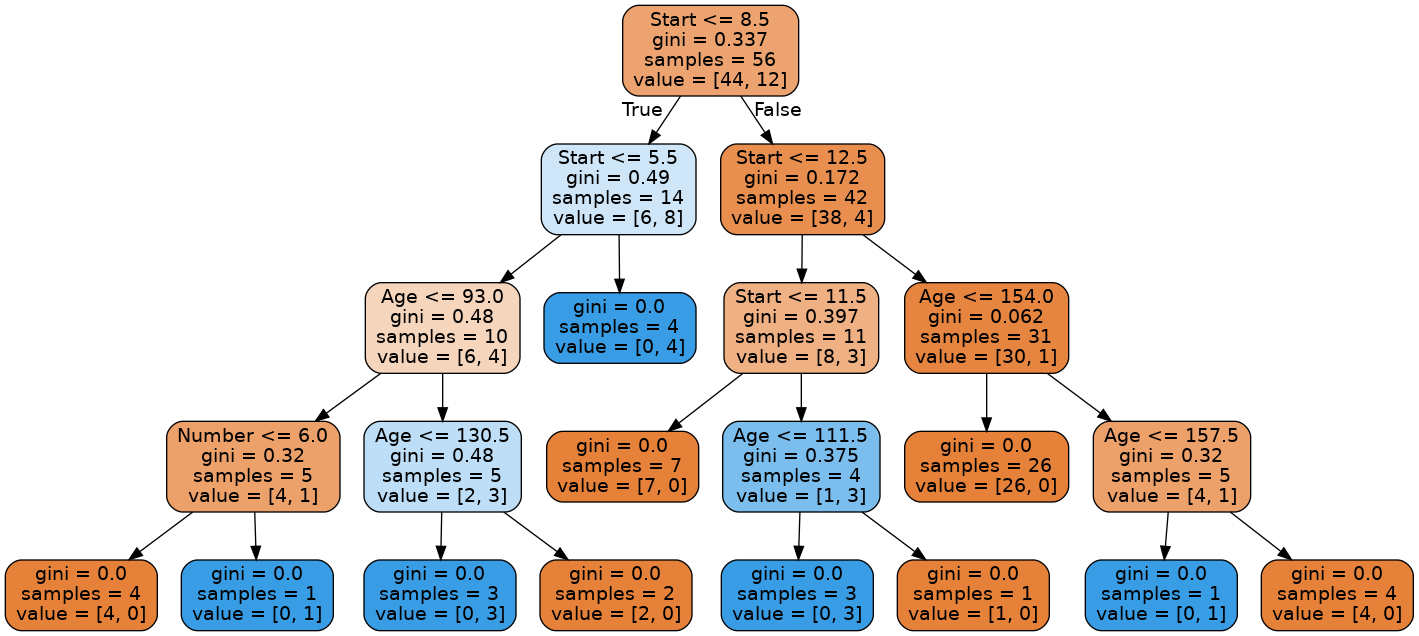

In [33]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [34]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Random Forests

**Lab Task #4:** Compare the decision tree model to a random forest.

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc_pred = rfc.predict(X_test)

In [37]:
# Now we can compute confusion matrix to evaluate the accuracy
# 4a
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 4  1]]


In [ ]:
# TODO 4a
# TODO -- Your code here.


[[19  2]
 [ 1  3]]


In [38]:
# Finally we will build a text report showing the main metrics
# 4b
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



In [ ]:
# TODO 4b
# TODO -- Your code here.


              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



Copyright 2021 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.